In [ ]:
# !pip install eo-learn-core==0.8.0
# !pip install eo-learn-io==0.8.0
!pip install rasterio==1.2.0
!pip install aenum

In [2]:
!git clone https://github.com/mickerott/tempcnn-example-sentinel2

Cloning into 'tempcnn-example-sentinel2'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 4), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [3]:
# add tempcnn-example-sentinel2 to PATH variable
import sys
from pathlib import Path
sys.path.append(str(Path('tempcnn-example-sentinel2').resolve()))

In [4]:
import urllib
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import rasterio

from tempcnn import *
from viz import get_colormap, get_boundarynorm, normalize_img

In [5]:
# # only during dev
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

## tempcnn-example-sentinel2
multivariate sits classification with temporal convolutional networks
example with Sentinel-2 data

## extract-images (now eolearn, later aws)
## pre-processing (mask clouds and interpolate)
## get reference data
## load pre-processed data
## time series visualization
## build tempcnn and fit
## predict map



## pre-processing (mask clouds and interpolate)

In [6]:
# # load reference data
# import urllib
# lclu_slovenia = 'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/maps/si_lulc_reference.tiff'
# urllib.request.urlretrieve(lclu_slovenia, 'labels.tif')
# with rasterio.open('labels.tif') as src:
#   class_labels = src.read()
# class_labels.shape

In [7]:
# !pip install eo-learn-features

In [8]:
# def preprocessing(images, masks):
#     """
#     Pre-processing of image time series: 1. Masking of clouds, 2. Temporal resampling through linear interpolation.
#     """
#     ##### DUMMY: load pre-extracted eolearn data #####
#     from eolearn.core import EOPatch, FeatureType
#     from eolearn.io import ExportToTiff
#     # load image data
#     patch_name = 'eopatch_id_102_col_7_row_9'
#     eo_slovenia = [
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/data/BANDS.npy.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/mask/IS_VALID.npy.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/bbox.pkl.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/meta_info.pkl.gz',
#     f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/timestamp.pkl.gz'
#     ]
#     for fp in eo_slovenia:
#         out_path = Path('.').resolve() / '/'.join(fp.split('/')[3:])
#         if out_path.is_dir():
#             out_path.mkdir(parents=True, exist_ok=True)
#         else:
#             out_path.parent.mkdir(parents=True, exist_ok=True)
#         if not out_path.exists():
#             urllib.request.urlretrieve(fp, out_path)[0]
      
#     eo_path = str(Path('.').resolve() / fp.split('/')[3] / patch_name)
#     print(eo_path)

#     patch = EOPatch.load(eo_path)

#     # linear interpolation of full time-series and date resampling
#     from eolearn.features import LinearInterpolation
#     resampled_range = ('2019-01-01', '2019-12-31', 10)
#     linear_interp = LinearInterpolation(
#         'BANDS', # name of field to interpolate
#         mask_feature=(FeatureType.MASK, 'IS_VALID'), # mask to be used in interpolation
#         resample_range=resampled_range # set the resampling range
#     )
#     patch = linear_interp.execute(patch)
#     patch.data['BANDS'] = (patch.data['BANDS']*255).astype('uint8')

#     # subset, manipulate bbox
#     from sentinelhub import BBox, CRS
#     patch.bbox = BBox([405000+3500, 5070000+3250, 410000-500, 5075000-750], crs=CRS.UTM_33N)
#     patch.data['BANDS'] = patch.data['BANDS'][:, 75:175, -150:-50, :]

#     input_list = []
#     for i, band_name in enumerate(['B02', 'B03', 'B04', 'B08', 'B11', 'B12']):
#         feature = (FeatureType.DATA, 'BANDS')
#         out_dir = 'gdrive/MyDrive'
#         export_task = ExportToTiff(feature, folder=out_dir, band_indices=[i], 
#                                    date_indices=[d for d in range(patch.data['BANDS'].shape[0])],
#                                   compress='lzw')
#         fn = f'{band_name}.tif'
#         export_task.execute(patch, filename=fn)
#         input_list.append(str(Path(out_dir).resolve()  / fn))
#     ##### END of DUMMY: load pre-extracted eolearn data #####

#     return input_list

# input_list = preprocessing(images=images, masks=None)

## get reference data

In [9]:
def get_reference_data(filepath, bbox):
    # ##### DUMMY: load from eolearn patch #####
    # from eolearn.core import EOPatch, FeatureType
    # from eolearn.io import ExportToTiff
    # # load image data
    # patch_name = 'eopatch_id_102_col_7_row_9'
    # eo_slovenia = [
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/mask_timeless/LULC.npy.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/bbox.pkl.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/meta_info.pkl.gz',
    # f'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/eopatches_slovenia_2019/{patch_name}/timestamp.pkl.gz'
    # ]
    # for fp in eo_slovenia:
    #     out_path = Path('.').resolve() / '/'.join(fp.split('/')[3:])
    #     if out_path.is_dir():
    #         out_path.mkdir(parents=True, exist_ok=True)
    #     else:
    #         out_path.parent.mkdir(parents=True, exist_ok=True)
    #     if not out_path.exists():
    #         urllib.request.urlretrieve(fp, out_path)[0]
      
    # eo_path = str(Path('.').resolve() / fp.split('/')[3] / patch_name)
    # print(eo_path)
    # patch = EOPatch.load(eo_path)

    # # subset, manipulate bbox
    # from sentinelhub import BBox, CRS
    # patch.bbox = BBox([405000+3500, 5070000+3250, 410000-500, 5075000-750], crs=CRS.UTM_33N)
    # patch.mask_timeless['LULC'] = patch.mask_timeless['LULC'][75:175, -150:-50, :]

    # out_dir = 'gdrive/MyDrive'
    # feature_name = 'LULC'
    # feature = (FeatureType.MASK_TIMELESS, feature_name)
    # export_task = ExportToTiff(feature, folder=out_dir, compress='lzw')
    # fn = 'labels.tif'
    # export_task.execute(patch, filename=fn)
    # labels_path = (Path(out_dir).resolve()  / fn)
    # print(labels_path)
    # ##### END DUMMY: load from eolearn patch #####

    # # load reference data
    # import urllib
    # filepath = 'http://eo-learn.sentinel-hub.com.s3.eu-central-1.amazonaws.com/maps/si_lulc_reference.tiff'
    # urllib.request.urlretrieve(filepath, 'labels.tif')
    # with rasterio.open('labels.tif') as src:
    #   class_labels = src.read()
    # class_labels.shape

    with rasterio.open(labels_path) as src:
        class_labels = src.read().squeeze()

    return class_labels

labels_path = '/content/tempcnn-example-sentinel2/toy_data/labels.tif'
class_labels = get_reference_data(filepath=labels_path, bbox=None)
class_labels.shape

(100, 100)

[ 162 1444 2552 4046  732    0    0    0 1064]


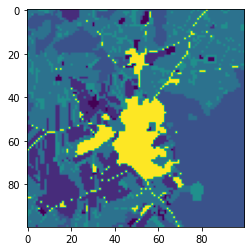

In [10]:
print(np.bincount(class_labels.flatten()))
plt.imshow(class_labels)

## load pre-processed data

In [11]:
input_list = [
              '/content/tempcnn-example-sentinel2/toy_data/B02.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B03.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B04.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B08.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B11.tif',
              '/content/tempcnn-example-sentinel2/toy_data/B12.tif'
              ]
print(input_list)

['/content/tempcnn-example-sentinel2/toy_data/B02.tif', '/content/tempcnn-example-sentinel2/toy_data/B03.tif', '/content/tempcnn-example-sentinel2/toy_data/B04.tif', '/content/tempcnn-example-sentinel2/toy_data/B08.tif', '/content/tempcnn-example-sentinel2/toy_data/B11.tif', '/content/tempcnn-example-sentinel2/toy_data/B12.tif']


In [12]:
def inputs_to_npy(input_list):
    arr = []
    for fp in input_list:
        with rasterio.open(fp) as src:
            a = src.read()
        arr.append(a)
    arr = np.stack(arr, axis=-1)
    return arr

inputs = inputs_to_npy(input_list)
inputs.shape, inputs.dtype

((37, 100, 100, 6), dtype('uint8'))

In [13]:
i=0

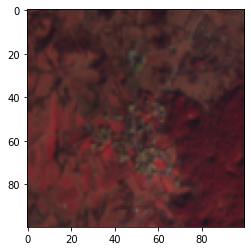

In [18]:
plt.imshow(inputs[i, :, :, [3,2,1]].swapaxes(0,1).swapaxes(1,2)*2)
i+=1

## build tempcnn and fit

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### prepare labels

In [189]:
y = class_labels.flatten()

# remove NoData samples 
valid_indices = np.where(y!=0)
y = y[valid_indices]
np.bincount(y.flatten().astype('int'))

# encoding of labels
classes = list(set(list(y)))
n_classes = len(classes)
le = LabelEncoder()
le.fit(classes)
y = le.transform(y)

# one-hot encoding of labels
y = to_categorical(y, len(list(set(list(y)))))
y.shape

(9838, 5)

### prepare EO data

In [190]:
shp = inputs.shape
X = inputs.reshape(shp[0], shp[1]*shp[2], shp[3]).swapaxes(0,1)

# remove NoData samples 
X = X[valid_indices]

X.shape

(9838, 37, 6)

### split into train and test set

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=np.argmax(y, axis=1))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7378, 37, 6), (2460, 37, 6), (7378, 5), (2460, 5))

### Build model with tf.keras

In [198]:
# keras normalization layer
percentiles = np.nanpercentile(X_train.reshape(7378*37, 6), [2, 98], axis=0).round(3).astype('float32')
min_percentile = percentiles[0, :][np.newaxis, np.newaxis, :]
max_percentile = percentiles[1, :][np.newaxis, np.newaxis, :]
print(min_percentile, max_percentile)

class Normalization(tf.keras.layers.Layer):
    def __init__(self):
        super(Normalization, self).__init__(dtype='float32')
        self.min_per = min_percentile
        self.max_per = max_percentile

    def call(self, x, training=False):
        x = ((x-self.min_per) / (self.max_per-self.min_per))
        x = tf.cast(x, dtype='float32')
        x = tf.clip_by_value(x, clip_value_min=0, clip_value_max=1)

        return x

[[[0. 0. 0. 0. 0. 0.]]] [[[37. 34. 37. 92. 77. 56.]]]


In [200]:
def Archi_NORM_3CONV64_1FC256(X, nbclasses):

    #-- get the input sizes
    m, L, depth = X.shape
    input_shape = (L,depth)

    #-- parameters of the architecture
    l2_rate = 1.e-6
    dropout_rate = 0.5
    nb_conv = 3
    nb_fc= 1
    nbunits_conv = 64 #-- will be double
    nbunits_fc = 256 #-- will be double

    # Define the input placeholder.
    X_input = Input(input_shape)
    X = X_input

    # preprocess
    X = Normalization()(X)

    #-- nb_conv CONV layers
    X = X_input
    for add in range(nb_conv):
        X = conv_bn_relu_drop(X, nbunits=nbunits_conv, kernel_size=5, kernel_regularizer=l2(l2_rate), dropout_rate=dropout_rate)
    #-- Flatten + 	1 FC layers
    X = Flatten()(X)
    for add in range(nb_fc):	
        X = fc_bn_relu_drop(X, nbunits=nbunits_fc, kernel_regularizer=l2(l2_rate), dropout_rate=dropout_rate)
      
    #-- SOFTMAX layer
    out = softmax(X, nbclasses, kernel_regularizer=l2(l2_rate))
      
    # Create model.
    return Model(inputs = X_input, outputs = out, name='Archi_NORM_3CONV64_1FC256')

### Train TempCNN model

In [201]:
# training parameters
lr = 0.001
n_epochs = 15

In [202]:
model = Archi_NORM_3CONV64_1FC256(X, nbclasses=n_classes)
model.compile(optimizer=optimizers.Adam(lr), loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.25)

Epoch 1/30
173/173 [==============================] - 7s 34ms/step - loss: 1.2142 - accuracy: 0.5535 - val_loss: 1.5747 - val_accuracy: 0.5902
Epoch 2/30
173/173 [==============================] - 5s 31ms/step - loss: 0.8015 - accuracy: 0.7079 - val_loss: 0.5862 - val_accuracy: 0.7707
Epoch 3/30
173/173 [==============================] - 5s 31ms/step - loss: 0.7231 - accuracy: 0.7379 - val_loss: 0.5829 - val_accuracy: 0.7751
Epoch 4/30
173/173 [==============================] - 5s 31ms/step - loss: 0.6836 - accuracy: 0.7432 - val_loss: 0.5457 - val_accuracy: 0.7984
Epoch 5/30
173/173 [==============================] - 5s 31ms/step - loss: 0.6453 - accuracy: 0.7562 - val_loss: 0.5700 - val_accuracy: 0.7794
Epoch 6/30
173/173 [==============================] - 5s 30ms/step - loss: 0.6283 - accuracy: 0.7630 - val_loss: 0.5415 - val_accuracy: 0.7881
Epoch 7/30
173/173 [==============================] - 5s 30ms/step - loss: 0.6316 - accuracy: 0.7630 - val_loss: 0.5777 - val_accuracy: 0.7875

### Evaluate model on test set

In [203]:
proba = model.predict(X_test)

y_test_original = le.inverse_transform(np.argmax(y_test, axis=-1))
pred_original = le.inverse_transform(np.argmax(proba, axis=-1))

cm = confusion_matrix(y_test_original, pred_original)
print(cm)

[[245   0 105   2   9]
 [  0 591  30  16   1]
 [ 24  15 938  21  14]
 [  0  13  98  70   2]
 [ 13   0  36   4 213]]


## predict map

In [204]:
%%time
shp = inputs.shape
X_all = inputs.reshape(shp[0], shp[1]*shp[2], shp[3])
X_all = X_all.swapaxes(0,1)

proba = model.predict(X_all)
pred_flat = le.inverse_transform(np.argmax(proba, axis=-1))
pred = pred_flat.reshape(shp[1], shp[2])
pred.shape

CPU times: user 2.35 s, sys: 137 ms, total: 2.48 s
Wall time: 1.64 s


In [211]:
# from matplotlib.colors import ListedColormap, BoundaryNorm
# from aenum import MultiValueEnum

# class LULC(MultiValueEnum):
#     """ Enum class containing basic LULC types
#     """
#     NO_DATA            = 'No Data',            0,  '#ffffff'
#     CULTIVATED_LAND    = 'Cultivated Land',    1,  '#ffa500'
#     FOREST             = 'Forest',             2,  '#054907'
#     GRASSLAND          = 'Grassland',          3,  '#ffff00'
#     SHRUBLAND          = 'Shrubland',          4,  '#806000'
#     WATER              = 'Water',              5,  '#069af3'
#     WETLAND            = 'Wetlands',           6,  '#95d0fc'
#     TUNDRA             = 'Tundra',             7,  '#967bb6'
#     ARTIFICIAL_SURFACE = 'Artificial Surface', 8,  '#dc143c'
#     BARELAND           = 'Bareland',           9,  '#a6a6a6'
#     SNOW_AND_ICE       = 'Snow and Ice',       10, '#000000'
    
#     @property
#     def id(self):
#         """ Returns an ID of an enum type

#         :return: An ID
#         :rtype: int
#         """
#         return self.values[1]

#     @property
#     def color(self):
#         """ Returns class color

#         :return: A color in hexadecimal representation
#         :rtype: str
#         """
#         return self.values[2]

# def get_bounds_from_ids(ids):
#     bounds = []
#     for i in range(len(ids)):
#         if i < len(ids) - 1:
#             if i == 0:
#                 diff = (ids[i + 1] - ids[i]) / 2
#                 bounds.append(ids[i] - diff)
#             diff = (ids[i + 1] - ids[i]) / 2
#             bounds.append(ids[i] + diff)
#         else:
#             diff = (ids[i] - ids[i - 1]) / 2
#             bounds.append(ids[i] + diff)
#     return bounds
    
# def get_colormap():
#     return ListedColormap([x.color for x in LULC], name="lulc_cmap")

# def get_boundarynorm():
#     lulc_bounds = get_bounds_from_ids([x.id for x in LULC])
#     return BoundaryNorm(lulc_bounds, lulc_cmap.N)

# def normalize_img(img):
#     new = []
#     for i in range(img.shape[-1]):
#         min_per, max_per = np.percentile(img[..., i], 2), np.percentile(img[..., i], 98)
#         x = (img[..., i]-min_per) / (max_per-min_per)
#         new.append(x)
#     new = np.clip(np.stack(new, axis=-1), 0, 1)
#     return new

In [212]:
lulc_cmap = get_colormap()
lulc_norm = get_boundarynorm()

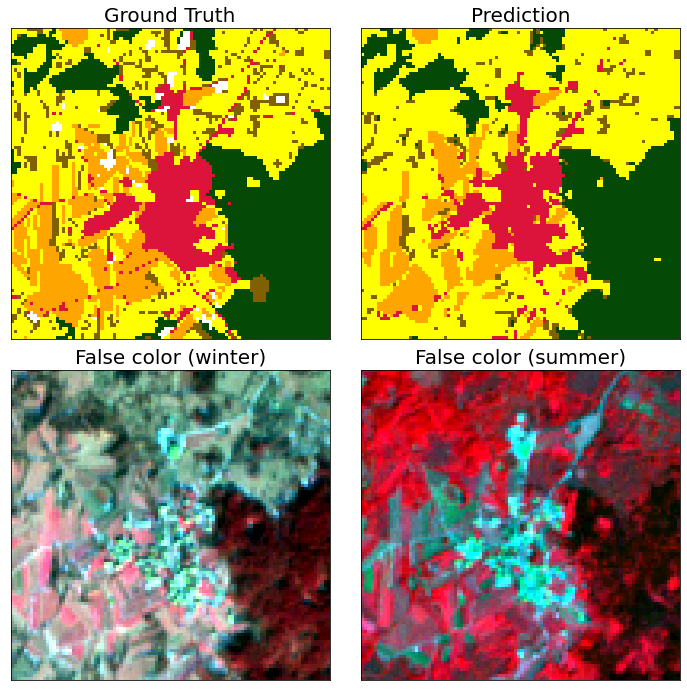

In [213]:
fig = plt.figure(figsize=(12, 12))

ax = plt.subplot(2, 2, 1)
plt.imshow(class_labels, cmap=lulc_cmap, norm=lulc_norm)
plt.xticks([])
plt.yticks([])
ax.set_aspect("auto")
plt.title('Ground Truth', fontsize=20)

ax = plt.subplot(2, 2, 2)
plt.imshow(pred, cmap=lulc_cmap, norm=lulc_norm)
plt.xticks([])
plt.yticks([])
ax.set_aspect("auto")
plt.title('Prediction', fontsize=20)

ax = plt.subplot(2, 2, 3)
img = inputs[3, ..., [3,2,1]].swapaxes(0,1).swapaxes(1,2)
img = normalize_img(img)
plt.imshow(img)
plt.xticks([])
plt.yticks([]);
ax.set_aspect("auto")
plt.title('False color (winter)', fontsize=20)

ax = plt.subplot(2, 2, 4)
img = inputs[16, ..., [3,2,1]].swapaxes(0,1).swapaxes(1,2)
img = normalize_img(img)
plt.imshow(img)
plt.xticks([])
plt.yticks([]);
ax.set_aspect("auto")
plt.title('False color (summer)', fontsize=20)

fig.subplots_adjust(wspace=0.1, hspace=0.1)